<a href="https://colab.research.google.com/github/yurifillippo/datascience/blob/master/Projeto_FortBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

De acordo com os dados, temos os seguintes questionamentos:

2.1 - Que tipo de problema estamos enfrentando e qual técnica você utilizaria para resolver esse problema?

O problema enfrentado é de classificação de clientes, onde temos que buscar prever se o cliente irá ou não realizar o pagamento da fatura no mês seguinte.

Vou utilizar um algoritimo de regressão logística da biblioteca Sklearng, porém, antes de iniciar o modelo, trabalharei os dados buscando identificar possíveis valores nulos, ajustar os tipos de variáveis, balanceamento dos dados, etc.

In [ ]:
#Importar bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Importar dataset
df = pd.read_csv('/content/drive/My Drive/FortBrasil/questao3_creditcard.csv', sep=";")

#Ver Tamanho do dataset
print(df.shape)

#Ver primeiras entradas
df.head()

(27278, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Terei que inicialmente que excluir a entrada de index 0, todo dataset aparenta ter valores somente do tipo int(), irei analisar e se for o caso, alterar o tipo das variáveis.

In [ ]:
#Eliminar primeira entrada e dar reset no index
df.drop([0], inplace=True)
df = df.reset_index(drop=True)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27272,100000,1,1,2,38,0,-1,-1,0,0,0,3042,1427,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
27273,80000,1,2,2,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
27274,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
27275,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [ ]:
#Ver tipo das variáveis
df.dtypes

X1     object
X2     object
X3     object
X4     object
X5     object
X6     object
X7     object
X8     object
X9     object
X10    object
X11    object
X12    object
X13    object
X14    object
X15    object
X16    object
X17    object
X18    object
X19    object
X20    object
X21    object
X22    object
X23    object
Y      object
dtype: object

Todo dataset está como int(), vou alterar todas as variáveis e em seguida analisar o resumo estatístico das variáveis, a fim de identificar algum valor null ou outlier. 

In [ ]:
#Alterar variáveis para tipo int
df = df.apply(pd.to_numeric)

In [ ]:
#Analisar resumo estatístico
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,2.727700e+04,27277.000000,27277.000000,27277.000000,27277.000000,2.727700e+04,27277.000000,27277.000000,27277.000000,27277.00000,27277.000000
mean,167569.369066,1.602156,1.854529,1.553287,35.498295,-0.011878,-0.129963,-0.164021,-0.216593,-0.262016,-0.287788,51349.616820,49293.677750,4.715000e+04,43394.140228,40425.756718,38998.131393,5693.453496,5.917119e+03,5239.719434,4831.205668,4837.650658,5197.53195,0.222092
std,129943.505747,0.489462,0.791572,0.521280,9.257493,1.124299,1.199402,1.199644,1.171351,1.136013,1.152935,73560.416137,71054.013602,6.936379e+04,64277.544992,60661.207444,59431.348578,16731.626186,2.337507e+04,17188.266605,15720.692286,15486.729576,17715.54146,0.415660
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3616.000000,3035.000000,2.748000e+03,2368.000000,1790.000000,1270.000000,1000.000000,8.400000e+02,390.000000,296.000000,244.000000,134.00000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22619.000000,21458.000000,2.026000e+04,19117.000000,18184.000000,17180.000000,2105.000000,2.012000e+03,1807.000000,1500.000000,1500.000000,1500.00000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67336.000000,64105.000000,6.038500e+04,54794.000000,50372.000000,49341.000000,5008.000000,5.000000e+03,4530.000000,4010.000000,4055.000000,4000.00000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.00000,1.000000


De acordo com o dataset acima, e com a quantidade de informações que recebi sobre os dados, os valores aparentam estar coerentes, sem valores nulos.

Por se tratar de dados onde a variável alvo podemos ter apenas dois valores ( 0 ou 1), para a melhor performance do nosso modelo, temos que avaliar a distribuição:

Pagaria fatura?
1 - Sim: 22.21% 
2 - Não: 77.79%




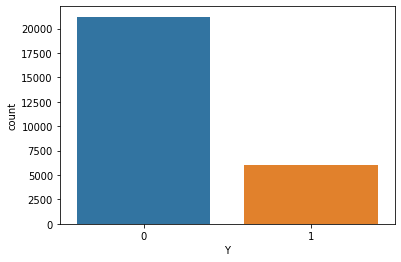

In [ ]:
#Verificar balanceamento do dataset
print("Pagaria fatura?")
print("1 - Sim: {:.2%} \n2 - Não: {:.2%}\n\n".format(df[df.Y ==1].shape[0] / df.Y.shape[0] , 1 - (df[df.Y ==1].shape[0] / (df.Y.shape[0]))))

#Gerar gráfico com balanceamento dos dados para transações Normais ou Fraudes
sns.countplot('Y', data=df);

O gráfico mostra o desbalanceamento dos dados, onde somente 22,21% pagariam a fatura e 77,79% não pagaria. O que indica que teremos que realizar um balanceamento nos dados para conseguimos uma boa performance no algoritimo.

Muitas das variáveis podem não ter relação com o resultado final, por este movito, vou analisar as variáveis e suas correlações, mantendo as correlações positivas para o modelo:

In [ ]:
#Criar matriz de correlação das variáveis
corr = df.corr()

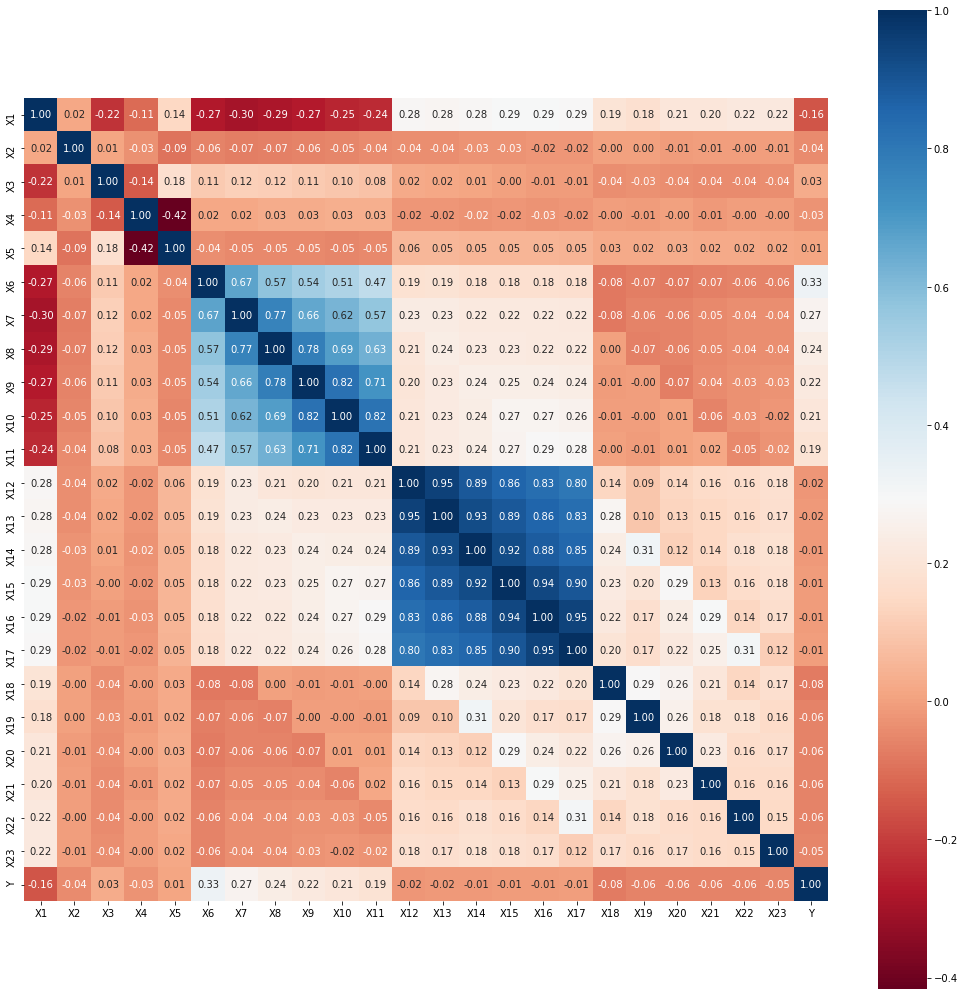

In [ ]:
#Plotar figure
fig, ax = plt.subplots(figsize=(18,18))

#Plotar heatmap de correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

In [ ]:
#Manter somente variáveis com correlação positiva
df.drop('X1', axis=1, inplace=True)
df.drop('X2', axis=1, inplace=True)
df.drop('X3', axis=1, inplace=True)
df.drop('X4', axis=1, inplace=True)
df.drop('X5', axis=1, inplace=True)
df.drop('X18', axis=1, inplace=True)
df.drop('X19', axis=1, inplace=True)
df.drop('X20', axis=1, inplace=True)
df.drop('X21', axis=1, inplace=True)
df.drop('X22', axis=1, inplace=True)
df.drop('X23', axis=1, inplace=True)

Neste momento vamos criar o modelo de Regressão Logística para tentar identificar se, de acordo com os dados, o cliente irá ou não fazer o pagamento

In [ ]:
#importar bibliotecas para modelo de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler;

1    3956
0    3956
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


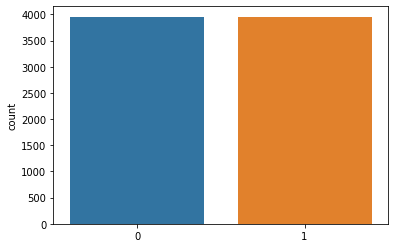

In [ ]:
#Criar algoritimo
model = LogisticRegression()

#Definir X e y
X = df.drop('Y', axis=1) 
y = df['Y']

#Difidir dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.35)

# usar técnica under-sampling para balancear os dados, nesta técnica iremos manter nossos dados de minoria, e iremos colher a mesma quantidade de dados da maioria
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

Com os dados balanceados, vamos treinar nosso modelo e avaliar sua performance.

In [ ]:
# Treinar um modelo de Regressão Logística
model = LogisticRegression(C=0.1, max_iter=350)

model.fit(X_rus, y_rus)

# Fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_rus)

In [ ]:
# imprimir relatório de classificação
print(classification_report(y_rus, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6381    0.8481    0.7282      3956
           1     0.7735    0.5190    0.6212      3956

    accuracy                         0.6835      7912
   macro avg     0.7058    0.6835    0.6747      7912
weighted avg     0.7058    0.6835    0.6747      7912



In [ ]:
#Importar dataset com novos dados
df_new = pd.read_csv("/content/drive/My Drive/FortBrasil/questao33_creditcard_clientes.csv", sep=';')

In [ ]:
df_new.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,70000,2,2,2,26,2,0,0,2,2,2,41087,42445,45020,44006,46905,46012,2007,3582,0,3601,0,1820
2,230000,2,1,2,27,-1,-1,-1,-1,-1,-1,16646,17265,13266,15339,14307,36923,17270,13281,15339,14307,37292,0
3,50000,1,2,2,33,2,0,0,0,0,0,30518,29618,22102,22734,23217,23680,1718,1500,1000,1000,1000,716
4,50000,1,1,2,29,2,2,2,2,2,2,24987,24300,26591,25865,27667,28264,0,2700,0,2225,1200,0


Como realizamos alterações com a quantidade de variáveis para manter somente as que concluimos como correlações positivas para o modelo, iremos manter somente as variáveis do dataset de treino e teste.

In [ ]:
#Eliminar primeira entrada e dar reset no index
df_new.drop([0], inplace=True)
df_new = df_new.reset_index(drop=True)
df_new.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,70000,2,2,2,26,2,0,0,2,2,2,41087,42445,45020,44006,46905,46012,2007,3582,0,3601,0,1820
1,230000,2,1,2,27,-1,-1,-1,-1,-1,-1,16646,17265,13266,15339,14307,36923,17270,13281,15339,14307,37292,0
2,50000,1,2,2,33,2,0,0,0,0,0,30518,29618,22102,22734,23217,23680,1718,1500,1000,1000,1000,716
3,50000,1,1,2,29,2,2,2,2,2,2,24987,24300,26591,25865,27667,28264,0,2700,0,2225,1200,0
4,10000,1,2,1,56,2,2,2,0,0,0,2097,4193,3978,4062,4196,4326,2300,0,150,200,200,160


In [ ]:
#Quantidade de entradas do dataset
df_new.shape

(2723, 23)

In [ ]:
#Alterar variáveis para tipo int
df_new = df_new.apply(pd.to_numeric)

In [ ]:
#Atribuir a outro dataset as variáveis que não utilizamos no modelo de machine learning
df_new2 = df_new.copy()

In [ ]:
#Selecionar apenas variáveis que utilizamos no dataset "df"
df_new = df_new[['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17']]

In [ ]:
#Verificar se há valores nulos no dataset
df_new.isnull().sum()

X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
dtype: int64

Após realizar as alterações no dataset, e constatar que não temos valores nulos, iremos rodar o algoritimo com os dados para realizar as previsões.

In [ ]:
#Realizar previsão com os novos dados
y_new = model.predict(df_new)

In [ ]:
#Atribuir variável alvo ao novo dataset
df_new['Y'] = y_new

#Atribuir variáveis que foram retiradas ao rodar o modelo preditivo
df_new['X1'] = df_new2.X1
df_new['X2'] = df_new2.X2
df_new['X3'] = df_new2.X3
df_new['X4'] = df_new2.X4
df_new['X5'] = df_new2.X5
df_new['X18'] = df_new2.X18
df_new['X19'] = df_new2.X19
df_new['X20'] = df_new2.X20
df_new['X21'] = df_new2.X21
df_new['X22'] = df_new2.X22
df_new['X23'] = df_new2.X23;

In [ ]:
#Ver primeiras entradas do novo dataset
df_new.head()

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,Y,X1,X2,X3,X4,X5,X18,X19,X20,X21,X22,X23
0,2,0,0,2,2,2,41087,42445,45020,44006,46905,46012,1,70000,2,2,2,26,2007,3582,0,3601,0,1820
1,-1,-1,-1,-1,-1,-1,16646,17265,13266,15339,14307,36923,0,230000,2,1,2,27,17270,13281,15339,14307,37292,0
2,2,0,0,0,0,0,30518,29618,22102,22734,23217,23680,1,50000,1,2,2,33,1718,1500,1000,1000,1000,716
3,2,2,2,2,2,2,24987,24300,26591,25865,27667,28264,1,50000,1,1,2,29,0,2700,0,2225,1200,0
4,2,2,2,0,0,0,2097,4193,3978,4062,4196,4326,1,10000,1,2,1,56,2300,0,150,200,200,160


Após criar o modelo de machine learning e rodar com novos dados, iremos ao segundo questionamento:

2.2 - Se você só pudesse enviar comunicação para 10% dos clientes devivo ao alto custo, para quais clientes abaixo você enviaria? Explique sua resposta. Utilizar os clientes da base "questao33_creditcard_clientes.csv"

De acordo com o questionamento e a situação, inicialmente buscaremos os clientes que algoritimo identificou que não irá realizar o pagamento:

Pagaria fatura?
1 - Sim: 22.95% 
2 - Não: 77.05%




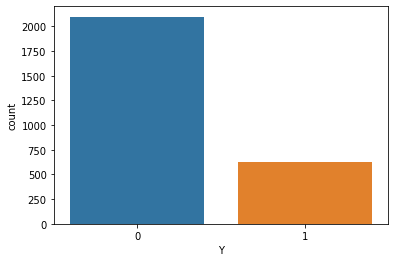

In [ ]:
#Informações do novo conjunto de dados
print("Pagaria fatura?")
print("1 - Sim: {:.2%} \n2 - Não: {:.2%}\n\n".format(df_new[df_new.Y ==1].shape[0] / df_new.Y.shape[0] , 1 - (df_new[df_new.Y ==1].shape[0] / (df_new.Y.shape[0]))))

#Gerar gráfico com balanceamento dos dados para transações Normais ou Fraudes
sns.countplot('Y', data=df_new);

In [ ]:
#Selecionar somente entradas que o algoritimo identificou como df_new["Y"] == 0
df_q2 = df_new.loc[df_new["Y"] == 0]

#Quantidade de clientes que são classificados como possíveis devedores
clientes = df_q2.shape[0]

print(clientes)

2098


De acordo com a quantidade de clientes identificados, 10% significa 210 clientes, buscaremos os mesmos a serem comunicados de acordo com suas Classes, como Gênero, Educação, Estado Civil e Idade.

In [ ]:
print("Cliente que possívelmente não vão realizar pagamentos: {:.2%}".format(df_q2.shape[0] / df_new.shape[0]))

Cliente que possívelmente não vão realizar pagamentos: 77.05%


In [ ]:
#Analisar quantidade de possíveis devedores por Gênero:
df_q2['X2'].value_counts()

2    1320
1     778
Name: X2, dtype: int64

In [ ]:
print("{} dos clientes são do sexo Feminino".format(df_q2['X2'].value_counts()[2]))

1320 dos clientes são do sexo Feminino


In [ ]:
#Selecionar informações no dataset onde informe somente clientes do sexo feminino
df_q2 = df_q2.loc[df_q2["X2"] == 2]

In [ ]:
#Analisar quantidade de possíveis devedores do sexo feminino de acordo com sua escolaridade:
df_q2['X3'].value_counts()

2    619
1    478
3    200
5     12
4      8
6      3
Name: X3, dtype: int64

In [ ]:
print("{} dos clientes são do sexo Feminino e possuem como grau de escolaridade: 2 - Universidade".format((df_q2['X3'].value_counts()[2])))

619 dos clientes são do sexo Feminino e possuem como grau de escolaridade: 2 - Universidade


In [ ]:
#Selecionar informações no dataset onde informe somente clientes que possuem grau de escolaridade universidade
df_q2 = df_q2.loc[df_q2["X3"] == 2]

In [ ]:
#Analisar quantidade de possíveis devedores do sexo feminino de acordo com sua escolaridade:
df_q2['X4'].value_counts()

1    333
2    282
3      3
0      1
Name: X4, dtype: int64

In [ ]:
print("{} dos clientes são do sexo feminino, com grau de escolaridade 2 - universidade e casadas".format(df_q2['X4'].value_counts()[2]))

282 dos clientes são do sexo feminino, com grau de escolaridade 2 - universidade e casadas


In [ ]:
#Selecionar informações no dataset onde informe somente clientes que são casadas
df_q2 = df_q2.loc[df_q2["X4"] == 1]

In [ ]:
#Analisar a idade dos clientes
df_q2.loc[df_q2['X5'] > 33].shape

(211, 24)

Após realizar algumas tentativas de encontrar a quantidade ideal de clientes por idade, os clientes que devem ser comunicados são:

- Clientes que o algoritimo realizou a previsão como "Não irá pagar"
- Todas do sexo feminino
- Todos com grau de escolaridade: 2 - Universidade
- Todas casadas
- Acima de 33 anos

Que totalizam 211 clientes, que representa 10,05% dos 2098 clientes que o algoritimo classificou como "Não irá realizar o pagamento".